# **Human Activity Recognition with Smartphones**

**Models-Artificial Neural Networks,Decision Tree Classifiers and Random Forest**

# **1.INTRODUCTION**

Human Activity Recognition (HAR) is a significant area of research where the goal is to recognize and classify activities performed by individuals based on sensor data collected from smartphones. This notebook focuses on utilizing machine learning techniques to build models that can accurately classify different human activities based on sensor readings.

**Import Libraries**

We will start by importing required Libraries for Exploratory Data Analysis ,Data Preprocesssing , plotting graphs and Model creation

In [47]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import random
from datetime import datetime
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE

In [2]:
# get the features from the file features.txt
features = list()
with open('UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


# **2. Data Loading**

2.1 Getting the train data

In [4]:
# Getting the train data

# Read feature data
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt',
                      delim_whitespace=True, header=None)

# Assign column names directly
X_train.columns = [f'feature_{i}' for i in range(1, len(X_train.columns) + 1)]

# Read subject data and add as a new column
subject_train = pd.read_csv(
    'UCI HAR Dataset/train/subject_train.txt', header=None)
X_train['subject'] = subject_train

# Read activity labels data and add as a new column
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', names=['Activity'])
y_train_labels = y_train['Activity'].map(
    {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'})
train = X_train
X_train['Activity'] = y_train['Activity']
X_train['ActivityName'] = y_train_labels

# Display a sample of the DataFrame
print(X_train.sample(2))

      feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
293    0.331172  -0.028691  -0.108391  -0.217812   0.208002   -0.28776   
1643   0.278475  -0.016677  -0.101461  -0.998376  -0.993036   -0.98887   

      feature_7  feature_8  feature_9  feature_10  ...  feature_555  \
293   -0.288567   0.163667  -0.267374    0.011970  ...    -0.842687   
1643  -0.998459  -0.992798  -0.990493   -0.944642  ...    -0.003545   

      feature_556  feature_557  feature_558  feature_559  feature_560  \
293      0.257041     0.333444    -0.420342    -0.692271     0.293125   
1643     0.044381     0.178367     0.157372    -0.848667     0.196692   

      feature_561  subject  Activity  ActivityName  
293      0.103991        1         1       WALKING  
1643     0.054488        8         5      STANDING  

[2 rows x 564 columns]


In [5]:
train.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561,subject,Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000,6.000000


# 
2.2 Getting the test data

In [6]:
# Getting the test

# Read feature data
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt',
                     delim_whitespace=True, header=None)

# Assign column names directly
X_test.columns = [f'feature_{i}' for i in range(1, len(X_test.columns) + 1)]

# Read subject data and add as a new column
X_test['subject'] = pd.read_csv(
    'UCI HAR Dataset/test/subject_test.txt', header=None)

# Read activity labels data and add as a new column
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', names=['Activity'])
y_test_labels = y_test['Activity'].map(
    {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'})
X_test['Activity'] = y_test['Activity']
X_test['ActivityName'] = y_test_labels
test = X_test

# Display a sample of the DataFrame
print(X_test.sample(2))

      feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
584    0.406895  -0.027527  -0.051407   0.138583  -0.027456  -0.437324   
1780   0.258945  -0.033093  -0.086626  -0.276133   0.259048  -0.390445   

      feature_7  feature_8  feature_9  feature_10  ...  feature_555  \
584    0.052707  -0.123382  -0.435316    0.387769  ...    -0.680837   
1780  -0.343353   0.211255  -0.354638    0.042322  ...     0.076921   

      feature_556  feature_557  feature_558  feature_559  feature_560  \
584      0.524783     0.926908     0.632684    -0.865012     0.108072   
1780     0.220149    -0.489565    -0.819409    -0.724671     0.287727   

      feature_561  subject  Activity        ActivityName  
584     -0.080378        4         3  WALKING_DOWNSTAIRS  
1780     0.001763       13         1             WALKING  

[2 rows x 564 columns]


# **3. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) techniques are applied to gain insights into the dataset. Visualizations such as count plots and histograms are used to understand the distribution of activities and sensor data. This helps in identifying any patterns or anomalies in the data that could impact model performance.

In [7]:
test.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_554,feature_555,feature_556,feature_557,feature_558,feature_559,feature_560,feature_561,subject,Activity
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427,3.577876
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984,1.740348
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000,1.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000,2.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000,4.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000,5.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000,6.000000


In [8]:
# Define the list of activity labels
labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING',
          'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

#
Investigating participants activity durations.

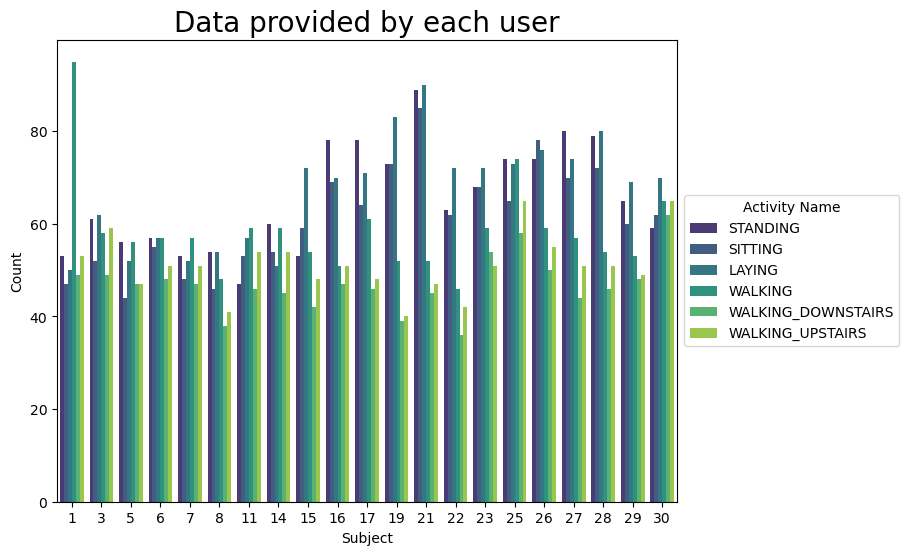

In [44]:
# Plotting count of activities per subject
plt.figure(figsize=(8, 6))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject', hue='ActivityName', data=train, palette='viridis')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.legend(title="Activity Name", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

# 
Determining the percentage of each activity in test data

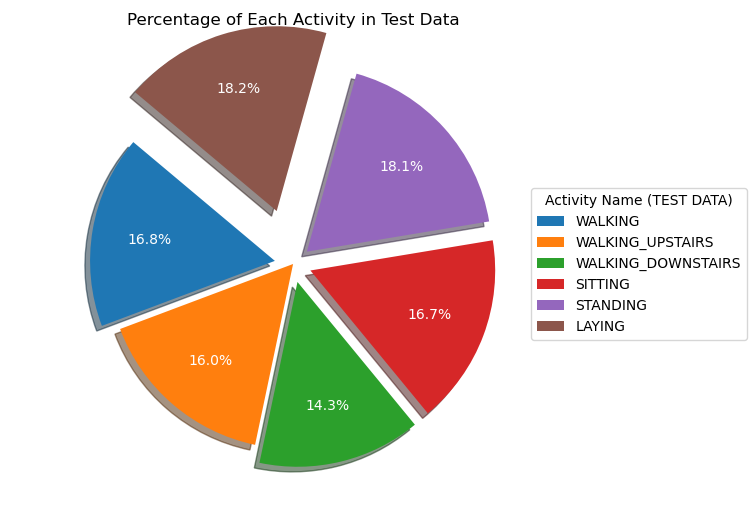

In [10]:

data = {
    'ActivityName': ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'],
    'Count': [test['ActivityName'].value_counts()[activity] for activity in ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']]
}

# Convert data to DataFrame
activity_df = pd.DataFrame(data)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(activity_df['Count'], labels=activity_df['ActivityName'], autopct='%1.1f%%', pctdistance=0.69, textprops=dict(color="w"),
        shadow=True, explode=(0.1, 0.0, 0.1, 0.1, 0.1, 0.3), startangle=140)

# Adding legend
plt.legend(activity_df['ActivityName'],
           title="Activity Name (TEST DATA)",
           loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Percentage of Each Activity in Test Data')
plt.show()

# 
**Static and Dynamic Activities**

In static activities (sit, stand, lie down) motion information will not be very useful.

In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.

/Users/ashikamohanm/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


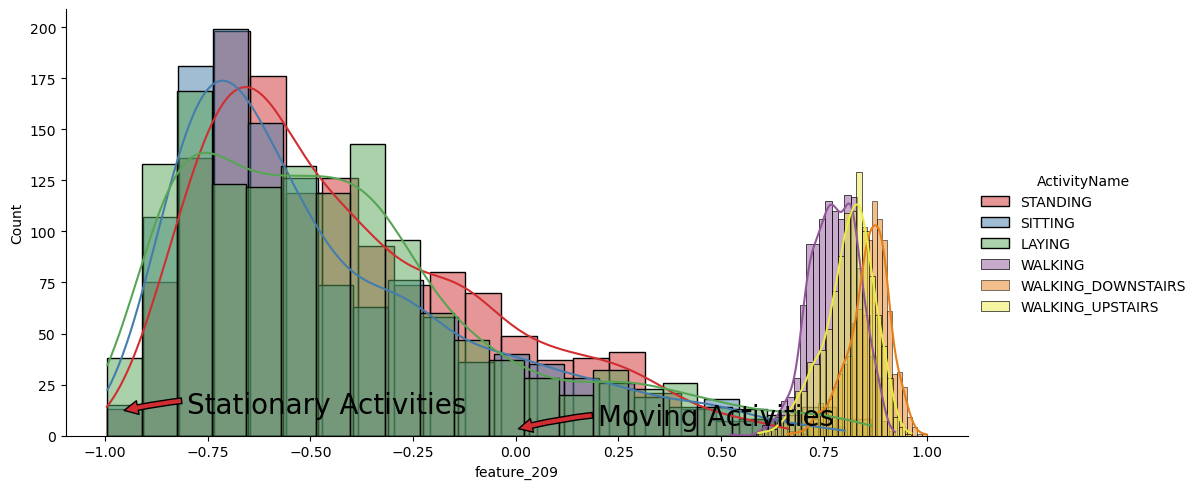

In [21]:
# Randomly select a feature from the dataset
random_feature = random.choice(train.columns[:-3])

# Set color palette
sns.set_palette("Set1", desat=0.80)

# Create a FacetGrid
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=5, aspect=2)

# Map a distribution plot for the random feature with legend
facetgrid.map(sns.histplot, random_feature, kde=True).add_legend()

# Annotate "Stationary Activities"
plt.annotate("Stationary Activities", xy=(-0.960, 12), xytext=(-0.8, 15), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

# Annotate "Moving Activities"
plt.annotate("Moving Activities", xy=(0, 3), xytext=(0.2, 9), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

# Show the plot
plt.show()

# **3.Data Preprocessing and feature engineering**

After loading the data, preprocessing steps are performed to ensure the data is in a suitable format for machine learning models. This includes handling duplicates, null values, and renaming columns for better readability. Additionally, the data is split into features (X_train, X_test) and labels (y_train, y_test) for training and testing the models.

Feature engineering plays a crucial role in improving model performance. In this section, various techniques such as scaling, encoding categorical variables, and dimensionality reduction using Principal Component Analysis (PCA) are applied to preprocess the features and enhance their predictive power.

In [22]:
# Data Preprocessing
# Finding number of duplicates
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [23]:
# Finding number of null values
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


X_train and y_train: ((7352, 561), (7352,))
X_test and y_test: ((2947, 561), (2947,))
Original Shape of Scaled Training Data: (7352, 561)
Shape of Transformed Training Data after PCA: (7352, 200)
Original Shape of Scaled Testing Data: (2947, 561)
Shape of Transformed Testing Data after PCA: (2947, 200)


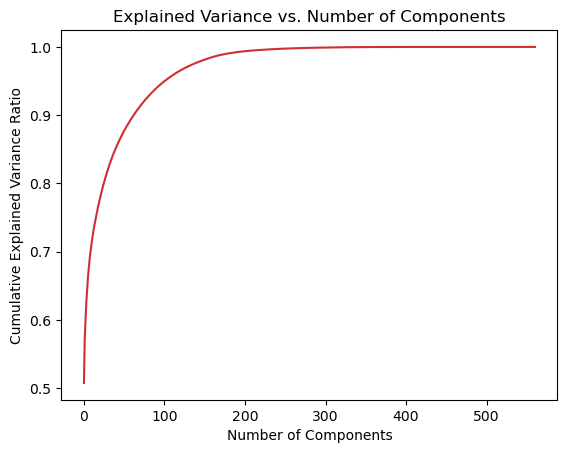

In [48]:
# Feature engineering
# Outlier Detection and Removal
def remove_outliers(X_train, y_train, contamination=0.1):
    clf = IsolationForest(contamination=contamination, random_state=42)
    y_outliers = clf.fit_predict(X_train)
    X_train_clean = X_train[y_outliers == 1]
    y_train_clean = y_train[y_outliers == 1]
    return X_train_clean, y_train_clean

# Feature Scaling


def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Feature Selection


def select_features(X_train, y_train, X_test, k=10):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    return X_train_selected, X_test_selected

# Dimensionality Reduction


def reduce_dimensionality(X_train, X_test, n_components=10):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca


# Split train data into features (X_train) and labels (y_train)
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train['ActivityName']

# Split test data into features (X_test) and labels (y_test)
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test['ActivityName']

# Print shapes of the datasets
print('X_train and y_train: ({}, {})'.format(X_train.shape, y_train.shape))
print('X_test and y_test: ({}, {})'.format(X_test.shape, y_test.shape))


scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(X_train)
scaled_test_data = scaler.transform(X_test)

# Perform Principle Component Analysis (PCA)
n_components = 200
pca = PCA(n_components=n_components)
pca.fit(scaled_train_data)

# Apply PCA transformation to both training and test data
x_train_pca = pca.transform(scaled_train_data)
x_test_pca = pca.transform(scaled_test_data)

# Print shapes of the original and transformed data
print('Original Shape of Scaled Training Data:', scaled_train_data.shape)
print('Shape of Transformed Training Data after PCA:', x_train_pca.shape)
print('Original Shape of Scaled Testing Data:', scaled_test_data.shape)
print('Shape of Transformed Testing Data after PCA:', x_test_pca.shape)

# Handle Categorical Variables
label_encoder = LabelEncoder()
X_train['Activity'] = y_train
X_test['Activity'] = y_test

# Encode Activity column
X_train['Activity'] = label_encoder.fit_transform(X_train['Activity'])
X_test['Activity'] = label_encoder.transform(X_test['Activity'])


# Choosing the number of components
pca = PCA().fit(scaled_train_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.show()

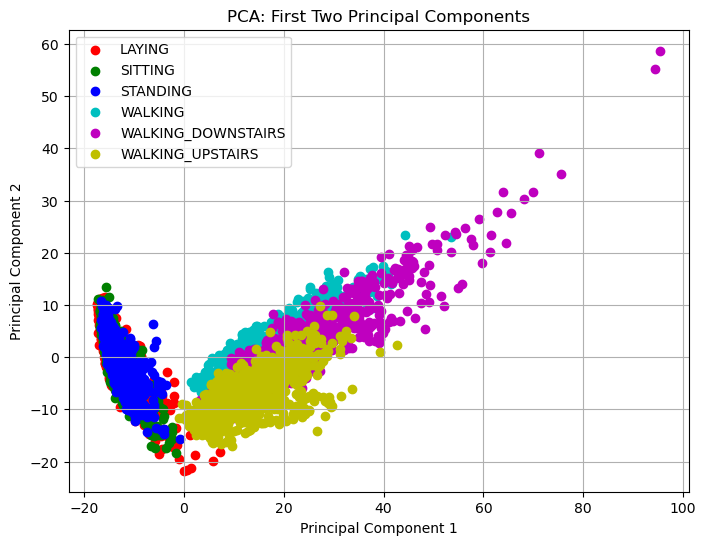

In [49]:
# Fit PCA on the scaled training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(scaled_train_data)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i, label in enumerate(labels):
    plt.scatter(X_train_pca[y_train == label, 0],
                X_train_pca[y_train == label, 1], c=colors[i], label=label)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

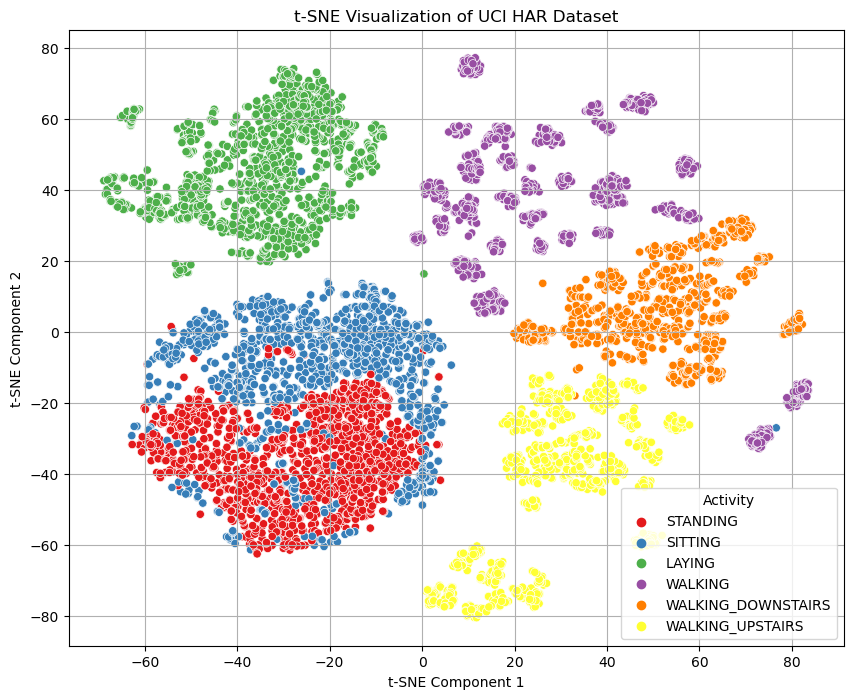

In [50]:
# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_train_tsne = tsne.fit_transform(X_train)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1],
                hue=y_train, palette='Set1', legend='full')
plt.title('t-SNE Visualization of UCI HAR Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Activity')
plt.grid(True)
plt.show()

In [25]:
# Converting this dataframe to csv file
train.to_csv('UCI HAR Dataset/train.csv', index=False)
test.to_csv('UCI HAR Dataset/test.csv', index=False)

In [26]:
# Split train data into features (X_train) and labels (y_train)
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train['ActivityName']

# Split test data into features (X_test) and labels (y_test)
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test['ActivityName']

# Print shapes of the datasets
print('X_train and y_train: ({}, {})'.format(X_train.shape, y_train.shape))
print('X_test and y_test: ({}, {})'.format(X_test.shape, y_test.shape))

X_train and y_train: ((7352, 561), (7352,))
X_test and y_test: ((2947, 561), (2947,))


# **4. Model Building**

4.1 Model Selection

Decision Tree, Random Forest, and Artificial Neural Network (ANN) models are chosen for building the HAR models due to their effectiveness in classification tasks. These models are well-suited for handling complex relationships in the data and can provide accurate predictions.

In [27]:
# Model building
# Defining the function to plot the confusion matrix
plt.rcParams["font.family"] = 'DejaVu Sans'


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots a confusion matrix.

    Parameters:
        cm (numpy array): The confusion matrix to be plotted.
        classes (list): A list of class labels.
        normalize (bool): If True, the confusion matrix will be normalized.
        title (str): The title of the plot.
        cmap (matplotlib colormap): The colormap used for the heatmap.

    Returns:
        None
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)

#
4.2 Model Training

The selected models are trained using the preprocessed data. GridSearchCV is employed for hyperparameter tuning, allowing the models to be optimized for better performance. The training process involves fitting the models to the training data and adjusting parameters to minimize errors.

In [28]:
# making a function to run any model specified
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True,
                  print_cm=True, cm_cmap=plt.cm.Greens):
    """
    Train and evaluate a machine learning model, including calculating accuracy, confusion matrix,
    classification report, F1 score, and plotting the confusion matrix.

    Parameters:
        model: The machine learning model to be trained and evaluated.
        X_train: The feature matrix of the training data.
        y_train: The target labels of the training data.
        X_test: The feature matrix of the test data.
        y_test: The target labels of the test data.
        class_labels: A list of class labels for the confusion matrix.
        cm_normalize: Whether to normalize the confusion matrix (default is True).
        print_cm: Whether to print the confusion matrix (default is True).
        cm_cmap: The colormap used for the confusion matrix (default is plt.cm.Greens).

    Returns:
        results: A dictionary containing the evaluation results.
    """

    # Initialize dictionary to store results
    results = dict()

    # Record start time of training
    train_start_time = datetime.now()
    print('Training the model..')

    # Train the model
    model.fit(X_train, y_train)

    # Record end time of training
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print('==> Training time:', results['training_time'])

    y_pred_proba = model.predict_proba(X_test)
    # Predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    print('==> Testing time:', results['testing_time'])
    results['predicted'] = y_pred

    # Calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    results['accuracy'] = accuracy
    print('==> Accuracy:', accuracy)

    # Calculate confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm

    # Print confusion matrix if requested
    if print_cm:
        print('\n ******** Confusion Matrix ********')
        print('\n', cm)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    plot_confusion_matrix(cm, classes=class_labels, normalize=cm_normalize,
                          title='Normalized Confusion Matrix', cmap=cm_cmap)
    plt.show()

    # Generate classification report
    print('**************** Classification Report ****************')
    classification_report = metrics.classification_report(y_test, y_pred)
    results['classification_report'] = classification_report
    print(classification_report)

    # Store trained model in results
    results['model'] = model

    # Calculate F1 score
    f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
    results['f1_score'] = f1_score
    print('\nF1 Score:', f1_score)

    # Calculate precision
    precision = precision_score(y_test, y_pred, average='weighted')
    results['precision'] = precision
    print('\nPrecision:', precision)

    # Calculate recall
    recall = recall_score(y_test, y_pred, average='weighted')
    results['recall'] = recall
    print('\nRecall:', recall)

    # Calculate ROC AUC using predicted probabilities
    roc_auc = roc_auc_score(y_test, y_pred_proba,
                            average='weighted', multi_class='ovr')
    results['roc_auc'] = roc_auc
    print('\nROC AUC:', roc_auc)

    return results

In [29]:
# Model training
# Making function to print the gridsearch Parameters
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))

    # parameters that gave best results while performing grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))

    #  number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal numbre of cross validation sets: {}'.format(model.n_splits_))

    # Average cross validated score of the best estimator, from the Grid Search
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of best estimator : {}'.format(
        model.best_score_))

# **5. Model Evaluation**

Once trained, the models are evaluated using various metrics such as accuracy, precision, recall, F1 score, ROC AUC, and confusion matrix. These metrics provide insights into the models' performance and their ability to correctly classify human activities based on sensor data.

Training the model..
==> Training time: 0:00:09.653371
Predicting test data
==> Testing time: 0:00:00.002125
==> Accuracy: 0.8737699355276553

 ******** Confusion Matrix ********

 [[537   0   0   0   0   0]
 [  0 373 118   0   0   0]
 [  0  59 473   0   0   0]
 [  0   0   0 471  16   9]
 [  0   0   0  19 354  47]
 [  0   0   0  64  40 367]]


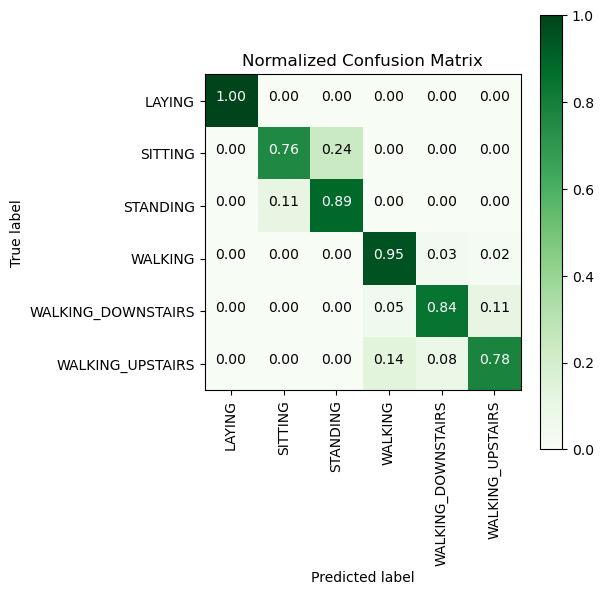

**************** Classification Report ****************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.86      0.76      0.81       491
           2       0.80      0.89      0.84       532
           3       0.85      0.95      0.90       496
           4       0.86      0.84      0.85       420
           5       0.87      0.78      0.82       471

    accuracy                           0.87      2947
   macro avg       0.87      0.87      0.87      2947
weighted avg       0.88      0.87      0.87      2947


F1 Score: 0.8727333282094736

Precision: 0.8753618020254099

Recall: 0.8737699355276553

ROC AUC: 0.9378949966722332


==> Best Estimator:
	DecisionTreeClassifier(max_depth=9)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 9}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.852703

In [30]:
# Model Evaluation
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on target labels and transform them to numeric values
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the parameters grid for the Decision Tree Classifier
parameters = {'max_depth': np.arange(3, 10, 2)}

# Initialize a Decision Tree Classifier
dt = DecisionTreeClassifier()

# Create a GridSearchCV object with the Decision Tree Classifier and parameters grid
dt_grid = GridSearchCV(dt, param_grid=parameters, n_jobs=-1)

# Train and evaluate the Decision Tree Classifier using the perform_model function
dt_grid_results = perform_model(
    dt_grid, X_train, y_train_encoded, X_test, y_test_encoded, class_labels=labels)


# Print attributes of the best model found by the grid search
print_grid_search_attributes(dt_grid_results['model'])

Training the model..
==> Training time: 0:03:59.184093
Predicting test data
==> Testing time: 0:00:00.024297
==> Accuracy: 0.9704784526637258

 ******** Confusion Matrix ********

 [[537   0   0   0   0   0]
 [  0 469  22   0   0   0]
 [  0  11 521   0   0   0]
 [  0   0   0 492   4   0]
 [  0   0   0   8 380  32]
 [  0   0   0   6   4 461]]


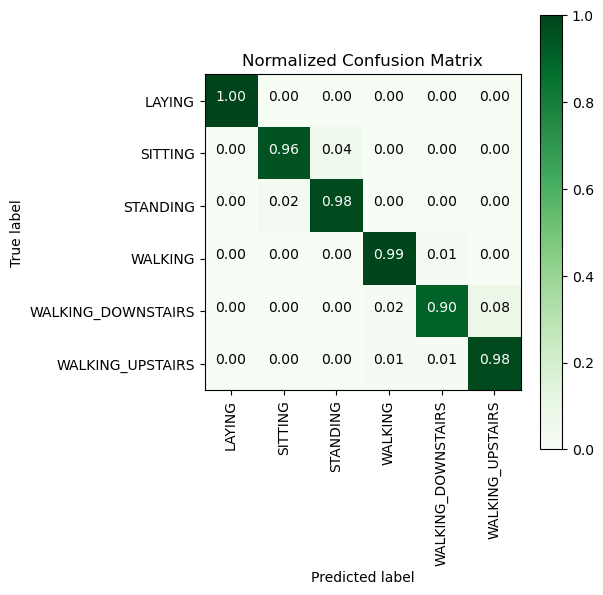

**************** Classification Report ****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.96      0.97       491
          STANDING       0.96      0.98      0.97       532
           WALKING       0.97      0.99      0.98       496
WALKING_DOWNSTAIRS       0.98      0.90      0.94       420
  WALKING_UPSTAIRS       0.94      0.98      0.96       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947


F1 Score: 0.970342889355549

Precision: 0.9708986992779333

Recall: 0.9704784526637258

ROC AUC: 0.9992982069362192


==> Best Estimator:
	RandomForestClassifier(max_depth=11, n_estimators=150)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 11, 'n_estimators': 150}

==> No. of CrossValidation sets:
	Total numbre of c

In [56]:
# Define the parameters grid for the Random Forest Classifier
params = {'n_estimators': np.arange(
    10, 201, 20), 'max_depth': np.arange(3, 15, 2)}

# Initialize a Random Forest Classifier
rfc = RandomForestClassifier()

# Create a GridSearchCV object with the Random Forest Classifier and parameters grid
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)

# Train and evaluate the Random Forest Classifier using the perform_model function
rfc_grid_results = perform_model(
    rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Print attributes of the best model found by the grid search
print_grid_search_attributes(rfc_grid_results['model'])

Training the model..


/Users/ashikamohanm/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


==> Training time: 0:02:39.698384
Predicting test data
==> Testing time: 0:00:00.009585
==> Accuracy: 0.9928741092636579

 ******** Confusion Matrix ********

 [[537   0   0   0   0   0]
 [  1 488   2   0   0   0]
 [  0   0 531   1   0   0]
 [  0   0   0 494   2   0]
 [  0   0   0   5 406   9]
 [  0   0   1   0   0 470]]


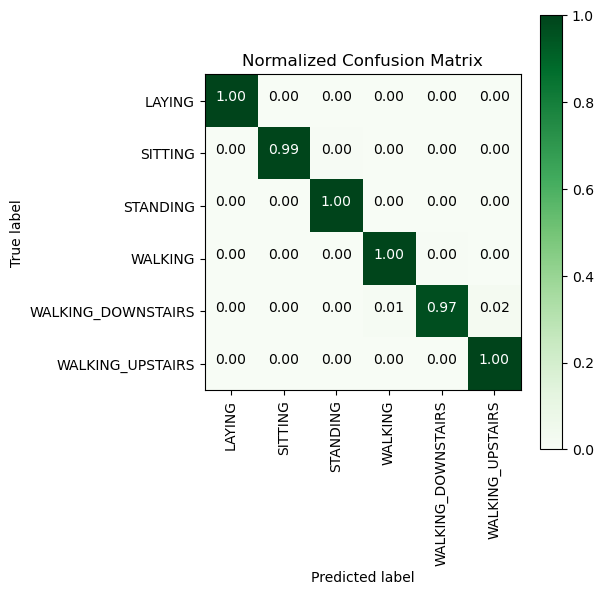

**************** Classification Report ****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       1.00      0.99      1.00       491
          STANDING       0.99      1.00      1.00       532
           WALKING       0.99      1.00      0.99       496
WALKING_DOWNSTAIRS       1.00      0.97      0.98       420
  WALKING_UPSTAIRS       0.98      1.00      0.99       471

          accuracy                           0.99      2947
         macro avg       0.99      0.99      0.99      2947
      weighted avg       0.99      0.99      0.99      2947


F1 Score: 0.9928543767986517

Precision: 0.9929258854136765

Recall: 0.9928741092636579

ROC AUC: 0.9999742516903969
Best parameters found by grid search: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'solver': 'adam'}


In [57]:
# Define the parameters for the grid search
params = {
    # Specify different hidden layer sizes
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh'],  # Activation functions to try
    'solver': ['adam'],  # Optimizer algorithm
    'alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
}

# Create an instance of the ANN model
ann = MLPClassifier()

# Create a grid search object
ann_grid = GridSearchCV(ann, param_grid=params, n_jobs=-1)

# Perform model evaluation
ann_grid_results = perform_model(
    ann_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# To observe the attributes of the best ANN model found by the grid search
print("Best parameters found by grid search:",
      ann_grid_results['model'].best_params_)

In [58]:
# Print the F1 scores, accuracy, and error
print('\n                            Accuracy      Error         F1 Score   Precision    Recall      ROC AUC')
print('                           ----------    --------     -----------  ----------  ----------  ----------')
print('Decision Tree             : {:.4f}%      {:.4f}%       {:.4f}        {:.4f}      {:.4f}      {:.4f}'.format(
    dt_grid_results['accuracy'] * 100, 100 -
    (dt_grid_results['accuracy'] * 100), dt_grid_results['f1_score'],
    dt_grid_results['precision'], dt_grid_results['recall'], dt_grid_results['roc_auc']))
print('Random Forest             : {:.4f}%      {:.4f}%       {:.4f}        {:.4f}      {:.4f}      {:.4f}'.format(
    rfc_grid_results['accuracy'] * 100, 100 -
    (rfc_grid_results['accuracy'] * 100), rfc_grid_results['f1_score'],
    rfc_grid_results['precision'], rfc_grid_results['recall'], rfc_grid_results['roc_auc']))
print('Artificial Neural Network : {:.4f}%      {:.4f}%       {:.4f}        {:.4f}      {:.4f}      {:.4f}'.format(
    ann_grid_results['accuracy'] * 100, 100 -
    (ann_grid_results['accuracy'] * 100), ann_grid_results['f1_score'],
    ann_grid_results['precision'], ann_grid_results['recall'], ann_grid_results['roc_auc']))


                            Accuracy      Error         F1 Score   Precision    Recall      ROC AUC
                           ----------    --------     -----------  ----------  ----------  ----------
Decision Tree             : 99.9661%      0.0339%       0.9997        0.9997      0.9997      0.9998
Random Forest             : 97.0478%      2.9522%       0.9703        0.9709      0.9705      0.9993
Artificial Neural Network : 99.2874%      0.7126%       0.9929        0.9929      0.9929      1.0000


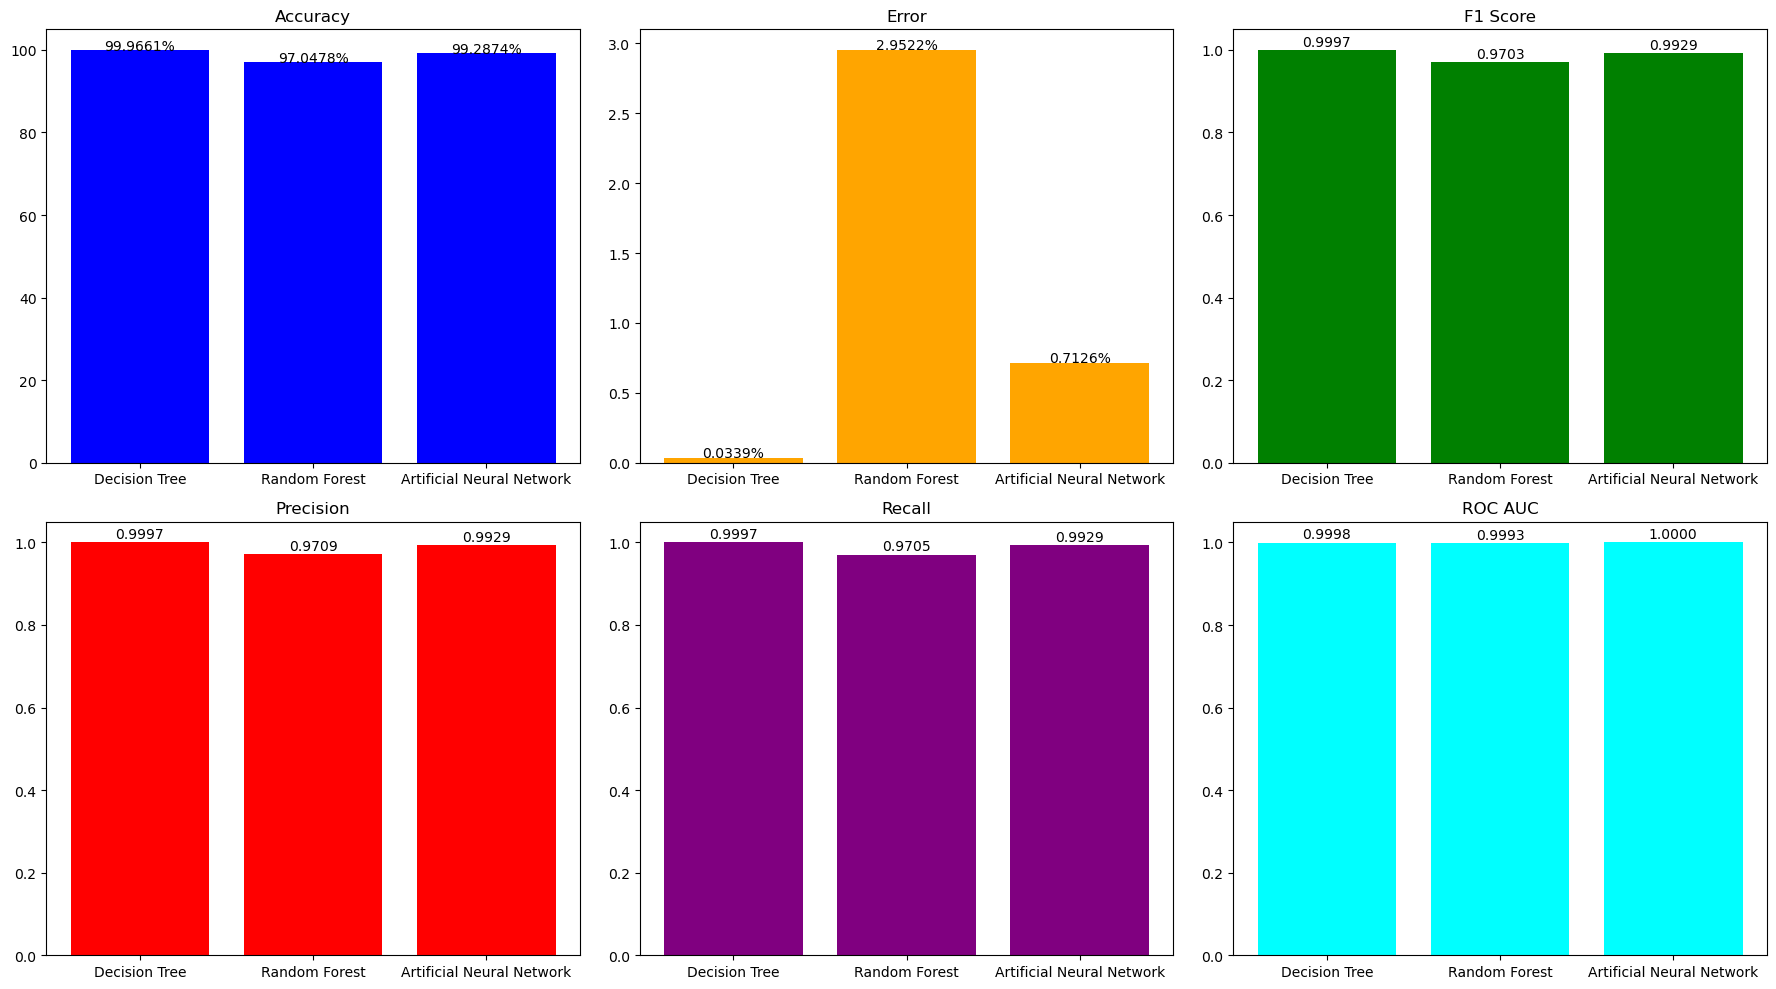

In [60]:
# Data
models = ['Decision Tree', 'Random Forest', 'Artificial Neural Network']
accuracy = [dt_grid_results['accuracy']*100,
            rfc_grid_results['accuracy']*100, ann_grid_results['accuracy']*100]
error = [100 - (dt_grid_results['accuracy'] * 100), 100 -
         (rfc_grid_results['accuracy'] * 100), 100 - (ann_grid_results['accuracy'] * 100)]
f1_score = [dt_grid_results['f1_score'],
            rfc_grid_results['f1_score'], ann_grid_results['f1_score']]
precision = [dt_grid_results['precision'],
             rfc_grid_results['precision'], ann_grid_results['precision']]
recall = [dt_grid_results['recall'],
          rfc_grid_results['recall'], ann_grid_results['recall']]
roc_auc = [dt_grid_results['roc_auc'],
           rfc_grid_results['roc_auc'], ann_grid_results['roc_auc']]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Plot Accuracy
axs[0, 0].bar(models, accuracy, color='blue')
axs[0, 0].set_title('Accuracy')
for i, v in enumerate(accuracy):
    axs[0, 0].text(i, v + 0.01, "{:.4f}%".format(v), ha='center')

# Plot Error
axs[0, 1].bar(models, error, color='orange')
axs[0, 1].set_title('Error')
for i, v in enumerate(error):
    axs[0, 1].text(i, v + 0.01, "{:.4f}%".format(v), ha='center')

# Plot F1 Score
axs[0, 2].bar(models, f1_score, color='green')
axs[0, 2].set_title('F1 Score')
for i, v in enumerate(f1_score):
    axs[0, 2].text(i, v + 0.01, "{:.4f}".format(v), ha='center')

# Plot Precision
axs[1, 0].bar(models, precision, color='red')
axs[1, 0].set_title('Precision')
for i, v in enumerate(precision):
    axs[1, 0].text(i, v + 0.01, "{:.4f}".format(v), ha='center')

# Plot Recall
axs[1, 1].bar(models, recall, color='purple')
axs[1, 1].set_title('Recall')
for i, v in enumerate(recall):
    axs[1, 1].text(i, v + 0.01, "{:.4f}".format(v), ha='center')

# Plot ROC AUC
axs[1, 2].bar(models, roc_auc, color='cyan')
axs[1, 2].set_title('ROC AUC')
for i, v in enumerate(roc_auc):
    axs[1, 2].text(i, v + 0.01, "{:.4f}".format(v), ha='center')

plt.tight_layout()
plt.show()